# Execução em um Computador Quântico

In [17]:
import numpy as np
import matplotlib.pyplot as plt


from qiskit import *
from qiskit.tools.visualization import plot_histogram
import qiskit.quantum_info as qi

# Módulo para ter acesso aos computadores da IBM
from qiskit import IBMQ

# Monitorar a execução do circuito
from qiskit.tools.monitor import job_monitor

In [ ]:
# Para se conectar com os computadores da IBM pela primeira vez
# IBMQ.save_account('token_de_acesso', overwrite = True)

# Para logar com os computadores
IBMQ.load_account()

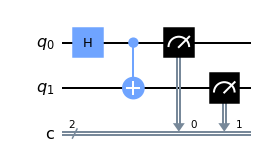

In [4]:
# Circuito para criar estados de Bell

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl')

In [15]:
# Verificação dos computadores quânticos disponíveis

provider = IBMQ.get_provider('ibm-q')

avaliable_cloud_backends = provider.backends()

for i in avaliable_cloud_backends:
    print(i)

ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_lagos
ibm_nairobi
ibm_perth
ibm_brisbane


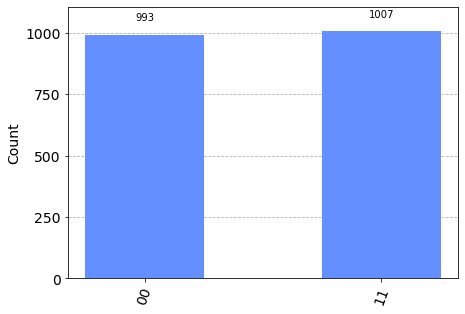

In [16]:
# Execução de um circuito quântico em um simulador

q_simulator = Aer.get_backend('qasm_simulator')

result = execute(qc, shots = 2000, backend = q_simulator).result()

plot_histogram(result.get_counts())

In [20]:
# Execução de um circuito quântico em um computador quântico

q_computer = provider.get_backend('ibm_lagos')

job = execute(qc, shots = 2000, backend = q_computer)

In [21]:
# Monitorar o status do circuito

job_monitor(job)

Job Status: job has successfully run


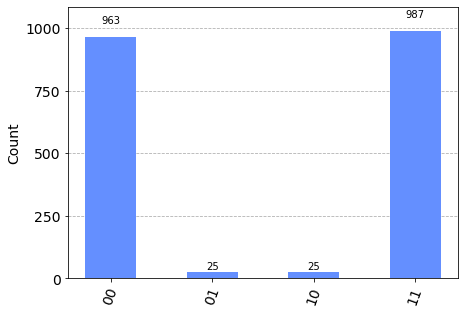

In [22]:
result = job.result()
plot_histogram(result.get_counts())